# Complex quantities

Let's start with a complex number $A$, with a real part $a$ and an imaginary part $b$:

$A = a + ib$

$a$ and $b$ are real numbers, and our magical and mysterious imaginary unit $i$ is given by $i^2=-1$.

It helps to see $A$ as a point or a vector in 2D space: the real part $a$ is the $x$ coordinate and the imaginary part $b$ is the $y$ coordinate. 

Let's treat it as a vector then:

$\vec{A} =\begin{pmatrix} a & b \end{pmatrix}  $

This vector is an arrow that points from the origin $(0, 0)$ to the point $(a, b)$. Let's plot a complex number this way, $A=0.5+1i$.



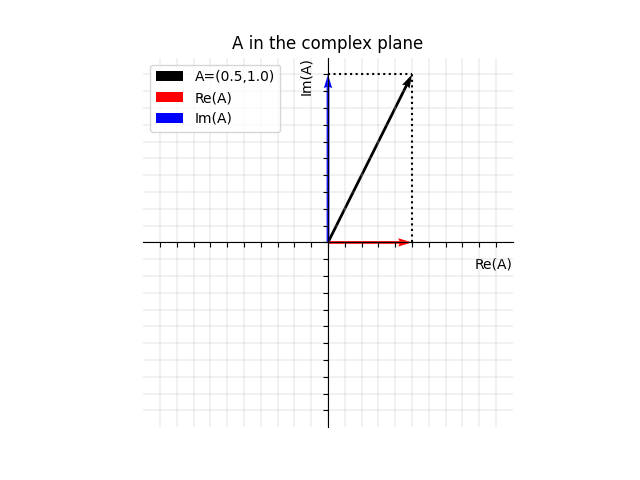

In [16]:
# first we import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def format_axis(ax, lim=1):
    ax.set_xlim(-(lim+0.1), lim+0.1)
    ax.set_ylim(-(lim+0.1), lim+0.1)
    ax.set_yticks(np.arange(-lim,lim+0.1,0.1))
    ax.set_xticks(np.arange(-lim,lim+0.1,0.1))
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_aspect('equal')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.grid(True, linewidth=0.25)
    ax.set_xlabel('Re(A)', loc='right')
    ax.set_ylabel('Im(A)', loc='top')

A = 0.5 + 1j

fig, ax = plt.subplots()

ax.set_title(f"A in the complex plane")
ax.quiver(0,0,np.real(A),np.imag(A),angles='xy', scale_units='xy', scale=1, color='k', label='A=({:.1f},{:.1f})'.format(np.real(A), np.imag(A)))
ax.quiver(0,0,np.real(A),0,angles='xy', scale_units='xy', scale=1, color='r', label='Re(A)')
ax.quiver(0,0,0,np.imag(A),angles='xy', scale_units='xy', scale=1, color='b', label='Im(A)')

ax.plot([0, np.real(A)], [np.imag(A), np.imag(A)], color='k', linestyle=':')
ax.plot([np.real(A), np.real(A)], [0, np.imag(A)], color='k', linestyle=':')
format_axis(ax)
ax.legend()
plt.show()

 On a two dimensional plot, it forms a right-angled triangle of sides $a$, $b$ and hypothenuse $c=\sqrt{a^2+b^2}$. In this case we can verify that $c=\sqrt{0.5^2+1^2}=\sqrt{5/4}=1.25$
 Let's now introduce some interactivity to the plot and vary the real and imaginary parts of $A$. All of this should be straightforward and perhaps a little tedious.

interactive(children=(FloatSlider(value=0.2, description='a', max=1.0, min=-1.0, step=0.05), FloatSlider(value…

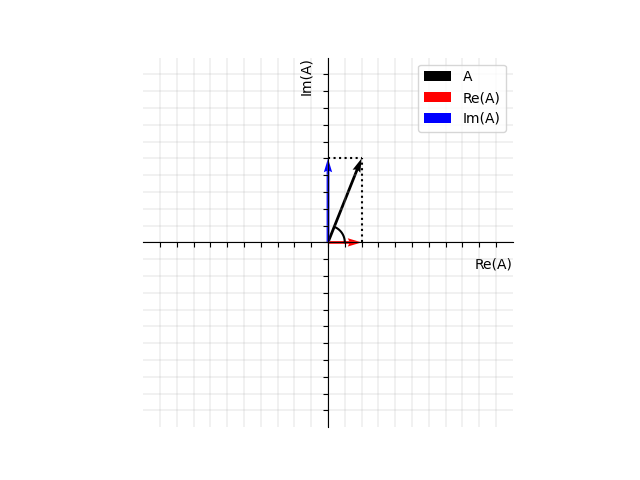

In [17]:
from ipywidgets import interact, FloatSlider

fig, ax = plt.subplots()
ax.set_title(f"A in the complex plane")    
    
def rotate(a, b):
    A = a + 1j*b
    ax.clear()
    ax.quiver(0,0,np.real(A),np.imag(A),angles='xy', scale_units='xy', scale=1, color='k', label='A')
    ax.quiver(0,0,np.real(A),0,angles='xy', scale_units='xy', scale=1, color='r', label='Re(A)')
    ax.quiver(0,0,0,np.imag(A),angles='xy', scale_units='xy', scale=1, color='b', label='Im(A)')
    ax.plot([0, np.real(A)], [np.imag(A), np.imag(A)], color='k', linestyle=':')
    ax.plot([np.real(A), np.real(A)], [0, np.imag(A)], color='k', linestyle=':')

    # show angle theta
    theta =np.arctan2(np.imag(A),np.real(A))
    if theta < 0:
        theta = 2*np.pi+theta

    thetaf =  np.linspace(0,1)*theta
    ax.plot(0.1*np.cos(thetaf), 0.1*np.sin(thetaf), color='k')
    
    ax.legend()
    format_axis(ax)

    
interact(rotate, a=FloatSlider(min=-1, max=1, step=0.05, value=0.2, description='a'),
        b=FloatSlider(min=-1, max=1, step=0.05, value=0.5, description='b'));

## Magnitude

It's straightforward to see from the above that the real and imaginary parts together describe the vector $\vec{A}$ (in black). The real part $a$ (red arrow) is the projection of the vector $\vec{A}$ onto the x axis, and the imaginary part the projection onto the y axis.

We have a few right-angled triangles here, so we should be able to use some trigonometry to work out how the lengths of the arrows are related. 

The length of the black arrow \vec{A} representing our complex number $A=a+ib$ can be obtained by Pythagoras' theorem:

$\|\vec{A}\|^2=a^2+b^2$

This is analogous to the magnitude of the complex number $A$:

$$|A|^2=a^2 + b^2$$

We use complex numbers to represent signals or waves. If $A$ was a complex signal, $|A|$ would be its amplitude. It is purely real and positive (since it's really a length).


## Phase angle and Euler's formula

The length of the red arrow, the real part $a$, will be $a = \|A\|\cos\theta$, where $\theta$ is the angle between the black arrow and the red arrow. Similarly, the blue arrow's length $b$ should be $\|A\|\sin\theta$.

The angle $\theta$ can be found from the sides $a$ and $b$, because $\frac{b}{a}=\frac{\|A\|\sin\theta}{\|A\|\cos\theta}=\tan\theta$, so $\theta=\tan^{-1}\left(\frac{b}{a}\right)$

Let's fix the length of $\vec{A}$ to 1, so $\|\vec{A}\|=1$. Now $a=\cos\theta$ and $b=\sin\theta$. For a complex signal

In vector notation this is:

$\vec{A} = \begin{pmatrix} \cos\theta & \sin\theta \end{pmatrix}$

If we go back and write $A$ as a complex number the usual way, we have:

$A=\cos\theta + i\sin\theta$

This should look familiar. We have defined a circle, the length of A is always the same so it will describe points at equal distance from the origin. What happens to the arrow $\vec{A}$ as we change $\theta$? 

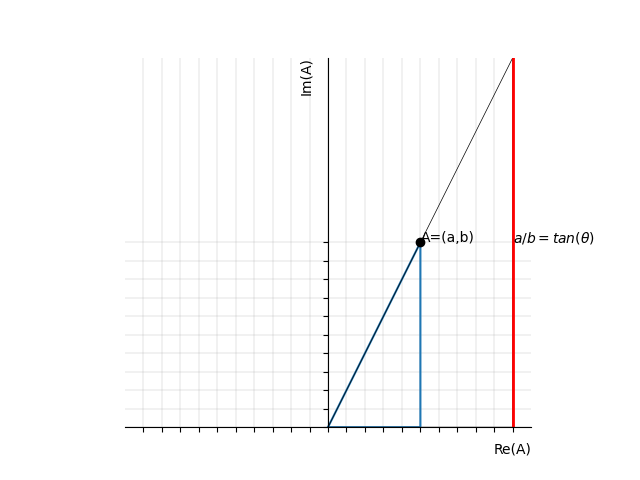

In [42]:
plt.close("all")

a = 0.5
b = 1.0
A = a + 1j*b

fig, ax = plt.subplots()
ax.plot((0,a, a, 0), (0,0,b,0))
ax.plot(a,b, 'ko')
ax.text(a,b, 'A=(a,b)')

ax.plot((0,1, 1, 0), (0,0,b/a,0), 'k', linewidth=0.5)
ax.plot((1, 1), (b/a,0), 'r', linewidth=2)
ax.text(1, b/a/2, r'$a/b=tan(\theta)$')

ax.set_title("")
format_axis(ax)
ax.set_ylim((0, b/a))

plt.show()

In [199]:


def rotate(ang):
    A = np.exp(1j*ang/180*np.pi)
    
    fig, ax = plt.subplots()

    ax.set_title(f"A in the complex plane")
    ax.quiver(0,0,np.real(A),np.imag(A),angles='xy', scale_units='xy', scale=1, color='k', label='A')
    ax.quiver(0,0,np.real(A),0,angles='xy', scale_units='xy', scale=1, color='r', label='Re(A)')
    ax.quiver(0,0,0,np.imag(A),angles='xy', scale_units='xy', scale=1, color='b', label='Im(A)')
    ax.plot([0, np.real(A)], [np.imag(A), np.imag(A)], color='k', linestyle=':')
    ax.plot([np.real(A), np.real(A)], [0, np.imag(A)], color='k', linestyle=':')
    theta = np.linspace(0,ang/180*np.pi, 40)
    ax.plot(np.cos(theta), np.sin(theta), 'k', linewidth=0.5)
    ax.legend()
    format_axis(ax, lim=1.5)
    plt.show()
    
interact(rotate, ang=FloatSlider(min=0, max=360, step=1, value=0, description='Angle theta (°)'));

interactive(children=(FloatSlider(value=0.0, description='Angle theta (°)', max=360.0, step=1.0), Output()), _…

What we saw when setting $\|A\|=1$ was one side of the (unbelievable) Euler's formula:

$e^{i \theta} = \cos(\theta) + i \sin(\theta)$

If we change $\theta$ here we describe a circle as above. Now we can represent $A$ in perhaps its most useful form for us, as a combination of length and angle but using the complex exponential: 

$A=\|A\|e^{i\theta}$

When dealing with sound waves, typically we use the real part to track the physical quantity of interest (e.g. pressure or displacement). The phase angle $\theta$ will vary with time, frequency and position in space. This notation will make it very easy to add and multiply signals together and obtain transfer functions in the frequency domain. Using exponentials will turn multiplication and division into addition and subtraction of phase angles respectively - we'll see how this works.

## Summing complex numbers as translation

When we add two signals represented as complex numbers, we are essentially doing vector addition. 
When adding $A$ and $B$, the x components (real parts) are added together, and the y components (imaginary parts) are added together, resulting in a new complex number $C=A+B$:

$A=a+ib$

$B=a'+ib'$

$C=(a+a')+i(b+b')$


If we think of $A$ as a point with coordinates $(a,b)$, then adding $\vec{B}$ to $A$ is equivalent to moving (or translating) $A$ along the path given by $\vec{B}$. The same is true if we think of $B$ as the starting point, to which we add $\vec{A}$ (addition is commutative). 

Try changing the angles of each complex number below and see their sum (in black).

In [166]:

def rotate(anga, angb):
    a = np.exp(1j*anga/180*np.pi)
    b = np.exp(1j*angb/180*np.pi)
    c = a+b
    
    fig, ax = plt.subplots()
    ax.set_title(f"Complex")
    
    ax.quiver(0,0,np.real(a),np.imag(a),angles='xy', scale_units='xy', scale=1, color='r', label='A')
    ax.quiver(np.real(a),np.imag(a),np.real(b),np.imag(b),angles='xy', scale_units='xy', scale=1, color='b', alpha=0.1)
    
    ax.quiver(0,0,np.real(b),np.imag(b),angles='xy', scale_units='xy', scale=1, color='b', label='B')
    ax.quiver(np.real(b),np.imag(b),np.real(a),np.imag(a),angles='xy', scale_units='xy', scale=1, color='r', alpha=0.1)
    
    ax.quiver(0,0,np.real(c),np.imag(c),angles='xy', scale_units='xy', scale=1, color='k', label='A+B')
    ax.legend()
    format_axis(ax, lim=2)
    
    
    plt.show()
    
interact(rotate, anga=FloatSlider(min=0, max=360, step=1, value=0, description='Angle A (°)'),
        angb=FloatSlider(min=0, max=360, step=1, value=180, description='Angle B (°)'));

interactive(children=(FloatSlider(value=0.0, description='Angle A (°)', max=360.0, step=1.0), FloatSlider(valu…

A lot can be gleaned from this plot.

You will notice that $A+B$ is sometimes zero (or the *null vector* (0,0) of zero length). If we think of addition as translation, getting zero out is equivalent to moving the point $A$ back to the origin. The easiest way to get to the origin from $A$ is to follow a line pointing straight to the origin. This would be a vector $\vec{B}$ with the same length as $\vec{A}$ but in the opposite direction: 

$A=a+ib$

$B=-a-ib$ 

so that $A+B=0 + 0i$

While it's obvious what the result would be when writing out explicitly real and imaginary parts, it might not seem so clear in polar form with exponentials. 

If $A=e^{i\theta}$, the angle of $B$ required to point in the opposite direction would be $\theta+\pi$ so that $B=e^{i(\theta+\pi)}$. This can be rewritten as $B = e^{i\theta}\cdot e^{i\pi}=-e^{i\theta}$ so that $B=-A$ and of course you get zero! Note that by multiplying $A$ with $e^{i\pi}$ (which is the same as multiplying by $-1$) we have produced a vector in the opposite direction, or equivalently rotated $A$ by 180 degrees or $\pi$ radians.

On the other hand, the sum of $A$ and $B$ is at its maximum length if they both point in the same direction or have the same angle $\theta$.

By playing with the angles above we can also verify that the magnitude of the sum of $A$ and $B$ is always less than or equal to the sum of their magnitudes which is an important inequality:

$|A+B|\leq |A| + |B|$

# Multiplication as rotation

We've seen that multiplication by $e^{i\pi}$ seems to rotate a complex number by 180 degrees. Complex multiplication can be interpreted as scaling and rotating a complex number about the origin. 

It's not at all obvious if we painstakingly multiply out the real and imaginary parts directly, as such:

$A=a+ib$

$B=a'+ib'$

$C=A\cdot B=(a+ib)(a'+ib')=(aa'-bb')+i(ab'+ba')$

The length of $C$ would be $|C|^2=(aa'-bb')^2+(ab'+ba')^2$. The angle of $C$ would be $\theta=\tan^{-1}{\frac{ab'+ba'}{aa'-bb'}}$. Hard to interpret.

If instead we use the polar form things are much clearer:

$A=|A| e^{i\theta}$

$B=|B| e^{i\phi}$

$C=|C|e^{i\gamma}=A\cdot B=|A| e^{i\theta}\cdot |B| e^{i\phi}=|A||B| e^{i(\theta+\phi)}$

Our new complex number $C$ has magnitude $|C|=|A| |B|$ and angle $\gamma=\theta+\phi$ and it's immediately obvious that it is scaling and rotating!

Every complex number (even purely real numbers) encode an angle and so they all perform a rotation. Even one complex number on its own can be interpreted this way: 

take $A=1+2i$. There is a sum (translation) and a rotation (multiplication with $i$). Multiplication by $i$ is a 90 degree counter-clockwise rotation! 

If $A$ was an instruction it would say: "Start from the origin, move to the right by one step (1,0), then turn 90 degrees (up) and move two steps (0, 2$i$)." 

Let's have a go in code, we'll fix the magnitudes of $A$ and $B$ to $=1$ so we only look at rotation.

In [177]:
angle_range = np.linspace(0,1,30)

def rotate(anga, angb):
    a = np.exp(1j*anga/180*np.pi)
    b = np.exp(1j*angb/180*np.pi)
    c = a*b
    
    fig, ax = plt.subplots()
    ax.set_xlim(-2.1, 2.1)
    ax.set_ylim(-2.1, 2.1)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title(f"Complex")
    
    ax.quiver(0,0,np.real(a),np.imag(a),angles='xy', scale_units='xy', scale=1, color='r', label='A')
    
    ax.quiver(0,0,np.real(b),np.imag(b),angles='xy', scale_units='xy', scale=1, color='b', label='B')
    
    ax.quiver(0,0,np.real(c),np.imag(c),angles='xy', scale_units='xy', scale=1, color='k', label=r'A$\cdot$B')
    
    # draw arc
    
    theta = anga/180*np.pi*angle_range
    phi = angb/180*np.pi*angle_range
        
    ax.plot(0.5*np.cos(theta), 0.5*np.sin(theta), 'r')
    ax.plot(0.25*np.cos(phi), 0.25*np.sin(phi), 'b')
    
    ax.plot(np.cos(theta+phi), np.sin(theta+phi), 'k')
    
    
    ax.legend()
    format_axis(ax)
    
    plt.show()
    
interact(rotate, anga=FloatSlider(min=0, max=360, step=1, value=15, description='Angle A (°)'),
        angb=FloatSlider(min=0, max=360, step=1, value=30, description='Angle B (°)'));

interactive(children=(FloatSlider(value=15.0, description='Angle A (°)', max=360.0, step=1.0), FloatSlider(val…

Now to acoustics. For a plane wave travelling along $x$, of amplitude $A$, and angular frequency $\omega$, at time $t$, acoustic pressure is given by:

$p(x,t) = A e^{i (\omega t -kx)}$

Let's not think about the physical aspects but just focus on the formula.
The phase angle of this complex quantity (assuming $A$ is real) is $\theta=\omega t-kx$.
If we look at a fixed position like $x=0$, then $\theta=\omega t$ and phase angle is varying only with time (since frequency is given). We can easily draw the arrow $\vec{p}$ if we know $\omega$ and $t$.



In [168]:
def rotate(time, freq):
    t = np.linspace(0, time, 80)
    
    p = np.exp(1j*2*np.pi*freq*t)
    fig, (ax1,ax2) = plt.subplots(ncols=2, sharey='row')

    
    ax1.quiver(0,0,np.real(p[-1]),np.imag(p[-1]),angles='xy', scale_units='xy', scale=1, color='k', label='A')
    ax1.plot([0, np.real(p[-1])], [np.imag(p[-1]), np.imag(p[-1])], color='k', linestyle=':')
    
    ax2.plot(t, np.real(p), 'k')
    ax2.plot(time, np.real(p[-1]), 'ko')
    format_axis(ax1)
    format_axis(ax2)
    ax1.plot()
    
    ax2.set_aspect('auto')
    
    ax2.set_xlim(0,1.1)
    
    ax2.spines['left'].set_position('zero')
    
    
    ax1.set_ylabel('Im(p)', loc='top')
    ax1.set_xlabel('Re(p)', loc='right')
    
    ax2.set_ylabel('Im(p)', loc='top')
    ax2.set_xlabel('Time', loc='right')
    
    plt.show()

interact(rotate, time=FloatSlider(min=0, max=1, step=0.05, value=0, description='Time'),
                 freq=FloatSlider(min=0, max=4, step=1, value=np.pi, description='Frequency'));

interactive(children=(FloatSlider(value=0.0, description='Time', max=1.0, step=0.05), FloatSlider(value=3.1415…

It does not matter too much if $A$ is itself complex. If it is, $A$ is a vector with a fixed direction and length. This vector is multiplied by the complex number $e^{i\theta}$ which is a rotation by $\theta$ around the origin, preserving magnitude.

Euler's equation in acoustics relates the gradient of pressure to particle velocity. 

$\nabla p = \frac{-i\omega}{\rho}\cdot v$

For our plane wave, the gradient of pressure (in the $x$ direction) is:

$\nabla p = \frac{\partial p}{\partial x}= i k e^{i\omega t}$

Substituting into Euler's equation gives us

$p=\rho c \cdot v$

Pressure and velocity are related by a factor (the *characteristic impedance* $z=\rho c$) which is a property of the medium (like air or some porous absorber) and can be complex. Often when modelling sound propagation in air, $\rho$ and $c$ are purely real (the characteristic impedance of air is typically in the order of 400 Rayls).

If this factor has an imaginary component, it implies a rotation, meaning pressure and velocity are not pointing in the same direction (and so are out of phase to some degree). This typically represents some form of damping within a medium.

Multiplying complex numbers directly this way is nothing like the dot product for vectors. We expect the dot product of two vectors to tell us how well they are aligned: if they are at right angles the output should be zero, while it should be greatest when they are facing the same (or opposite) direction. The simple product of two complex numbers doesn't give us the angle between them, but their sum.

If we want the angle between two complex numbers, one way is to use division. 

$\frac{A}{B}=\frac{|A|}{|B|}\frac{e^{i\theta}}{e^{i\phi}} = \frac{|A|}{|B|} e^{i(\theta-\phi)}$

This will result in a complex number having as angle the difference between the two, but its magnitude is the ratio of magnitudes $|A|$ and $|B|$.

The dot product for complex numbers makes use of complex conjugation.

The complex conjugate of $A$ is usually denoted $\bar{A}$ and is obtained by reversing its imaginary part:


$\bar{A}=a-ib$

Using the polar form we can actually see the geometry more clearly:

$\bar{A} = |A|\cos\theta - i|A|\sin\theta = |A|\cos(-\theta) + i |A|\sin(-\theta)$

The angle of $\bar{A}$ is $-\theta$. This is the same as reflecting the vector $\vec{A}$ about the x axis. Using complex exponentials:

$\bar{A}=|A|e^{-i\theta}$

Now we can easily see that the product of $A$ with its conjugate $\bar{A}$ will give us $|A|^2$, which is purely real.

$A\bar{A}=|A|^2e^{i(\theta-\theta)}=|A|^2$

When plotting these it's easy to see how $\cos \theta$ and $\sin \theta$ can be obtained by combining $e^{i\theta}$ and its conjugate $e^{-i\theta}$